In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install bokeh


  Obtaining dependency information for bokeh from https://files.pythonhosted.org/packages/f9/24/d8949753839db67197a33014b854cbed2126f8c871e03723e7abddcca12a/bokeh-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.2 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for PyYAML>=3.10 from https://files.pythonhosted.org/packages/b3/34/65bb4b2d7908044963ebf614fe0fdb080773fc7030d7e39c8d3eddcd4257/PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB 1.4 MB/s eta 0:00:06
   ---------------------------------------- 0.0/7.0 MB 495.5 kB/s eta 0:00:15
    --------------------------------------- 0.2/7.0 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.5/7.0 MB 3.7 MB/s eta 0:00:02


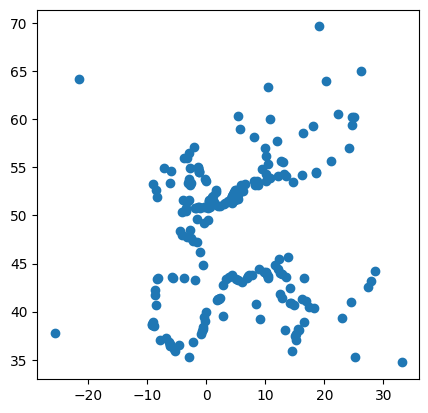

In [3]:
# First after installing libraries, i wish to see what my data acually looks like. 

import geopandas as gpd
import matplotlib.pyplot as plt

# This is the path to my shapefile
shapefile_path = r"C:\Users\sasch\Downloads\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\Coastal-city-inundation-2m-4258.shp"

# This load the shapefile
gdf = gpd.read_file(shapefile_path)

# This will plot the shapefile
gdf.plot()
plt.show()


In [4]:
# Now i wish to se what tabels, rows, and columns there is within the data. 

import geopandas as gpd

# Path again to my shapefile containing the data
shapefile_path = r"C:\Users\sasch\Downloads\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\Coastal-city-inundation-2m-4258.shp"

# This again loads my shapefile
gdf = gpd.read_file(shapefile_path)

# This will display the different columns in my data
print("Columns:")
print(gdf.columns)

# This will display general information about the GeoDataFrame
print("\nGeneral information:")
print(gdf.info())

# This code will display the first few rows in the data
print("\nFirst few rows:")
print(gdf.head())


Columns:
Index(['OBJECTID', 'URAU_CODE', 'URAU_CATG', 'ORIG_FID', 'FID_1', 'FID_inunda',
       'Id', 'gridcode', 'FID_core_c', 'URAU_COD_1', 'URAU_CAT_1', 'area',
       'FID_12', 'URAU_COD_2', 'URAU_CAT_2', 'SHAPE_AR_1', 'SHAPE_LE_1',
       'area_1', 'OID_', 'URAU_COD_3', 'Cnt_URAU_C', 'Sum_area', 'pc2marea',
       'pc1m_ar', 'UA_ar_cl', 'geometry'],
      dtype='object')

General information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    235 non-null    int64   
 1   URAU_CODE   235 non-null    object  
 2   URAU_CATG   235 non-null    object  
 3   ORIG_FID    235 non-null    int64   
 4   FID_1       235 non-null    int64   
 5   FID_inunda  235 non-null    int64   
 6   Id          235 non-null    int64   
 7   gridcode    235 non-null    int64   
 8   FID_core_c  235 non-null    int64   
 9   URAU_COD_1  222 non

In [11]:
import folium
import geopandas as gpd

# Loads the GeoDataFrame
gdf = gpd.read_file(r"C:\Users\sasch\Downloads\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\Coastal-city-inundation-2m-4258.shp")

# This finds the minimum and maximum inundation percentage. I know this is the inundation percentage from the step before
min_inundation = gdf['pc2marea'].min()
max_inundation = gdf['pc2marea'].max()

# This creates a Folium map with a starting at Denmark. 
m = folium.Map(location=[56.2639, 9.5018], zoom_start=6)  # Here is the coordinates so that the map will start aproximatly at Denmark.

# Define a function to normalize the values to marker sizes. Here the markers will have size by its inudation percentage. 
def normalize(value, min_value, max_value, min_size=5, max_size=20):
    normalized_value = (value - min_value) / (max_value - min_value)
    return min_size + normalized_value * (max_size - min_size)

# This adds a GeoJson layer with different colored markers (blue, green, orange) and with a hover effect for interactivity. 
for idx, row in gdf.iterrows():
    color = 'red'  # Start with a default color
    if row['pc2marea'] < 25:
        color = 'blue'
    elif row['pc2marea'] < 50:
        color = 'green'
    elif row['pc2marea'] < 75:
        color = 'orange'
    
    tooltip_text = f"City: {row['URAU_CODE']}<br>Inundation Percentage: {row['pc2marea']}%" # Here i know that the URAU_CODE has the city names again, from the earlier step.
    
    # Here i wished to modify and change the tooltip for the cities only in Denmark, with the acutal number of the population in each Danish city
    if row['URAU_CODE'] == 'DK001C1':
        tooltip_text += "<br>Population: 659 350"  # Additional text for DK001C1 city
    elif row['URAU_CODE'] == 'DK002C1':
        tooltip_text += "<br>Population: 367 095"  # Additional text for DK002C1 city
    elif row['URAU_CODE'] == 'DK003C1':
        tooltip_text += "<br>Population: 209 078"  # Additional text for DK003C1 city
    elif row['URAU_CODE'] == 'DK004C2':
        tooltip_text += "<br>Population: 223 174"  # Additional text for DK004C2 city
    
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],  # Place the marker at the centroid of each polygon
        radius=normalize(row['pc2marea'], min_inundation, max_inundation),
        color=color,
        fill=True,
        fill_opacity=0.7,
        tooltip=tooltip_text
    ).add_to(m)

# This adds a legend to the map, which i want to be inside a box in the top right corner of my map, to display what information is seen on the map withput being in the way of any information. 
legend_html = '''
<div style="position: fixed; top: 10px; right: 10px; z-index:1000; font-size: 14px; background-color: white; border: 1px solid black; padding: 10px;">
    <p><strong>Area inundated with 2m sea level rise if no coastal protection </strong></p>
    <p><i style="background:red; width:20px; height:20px; display:inline-block;"></i> > 75%</p>
    <p><i style="background:orange; width:20px; height:20px; display:inline-block;"></i> 50% - 75%</p>
    <p><i style="background:green; width:20px; height:20px; display:inline-block;"></i> 25% - 50%</p>
    <p><i style="background:blue; width:20px; height:20px; display:inline-block;"></i> < 25%</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map - This displays my map and makes it visable
m

In [10]:
from bokeh.plotting import figure, output_notebook, show # This does so that the plot shows directly in the notebook
from bokeh.models import ColumnDataSource, HoverTool, ColorBar
from bokeh.transform import linear_cmap

import geopandas as gpd
from bokeh.transform import linear_cmap
from bokeh.models import LinearColorMapper, ColorBar

# Again, loads the GeoDataFrame
gdf = gpd.read_file(r"C:\Users\sasch\Downloads\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\eea_v_4258_100_k_inundated-area-2m_p_2018_v01_r00\Coastal-city-inundation-2m-4258.shp")

# This will also define the color which again will be based on the inundation percentage.
def get_color(inundation):
    if inundation < 25:
        return 'blue'
    elif inundation < 50:
        return 'green'
    elif inundation < 75:
        return 'orange'
    else:
        return 'red'

# Creating a Bokeh plot (a point distribution map)
output_notebook()
p = figure(title="Point Distribution over areas inudated with 2m sea level rise if no coastal protection", x_axis_label="Longitude", y_axis_label="Latitude")

# This will extract data from GeoDataFrame
source = ColumnDataSource(data=dict(
    lon=gdf.geometry.x,
    lat=gdf.geometry.y,
    city=gdf['URAU_CODE'],
    inundation=gdf['pc2marea']
))

# Defines color mapper
color_mapper = linear_cmap(field_name='inundation', palette=['blue', 'green', 'orange', 'red'], low=0, high=100)

# Plots the different points on the map with color mapper
p.scatter('lon', 'lat', size=10, color=color_mapper, alpha=0.5, source=source)

# This will add hover tool to it
hover = HoverTool(tooltips=[("City", "@city"), ("Inundation Percentage", "@inundation%")])
p.add_tools(hover)

# This will add a color bar to it
color_bar = ColorBar(color_mapper=color_mapper['transform'], width=8, location=(0,0))
p.add_layout(color_bar, 'right')

# This shows the plot
show(p)


Loading BokehJS ...